In [1]:
# Created by: Jess Gallo
# Date Created: 10/10/2022
# Last Modified: 10/10/2022
# Description: Data Glacier Week 10

In [2]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import warnings

In [3]:
# Import Dataset
filename = r'C:\Users\Gallo\Downloads\Healthcare_dataset.xlsx'

# sheet 1 name is 'Feature Description'
dataset = pd.read_excel(filename, sheet_name = 'Dataset')
df = pd.DataFrame(dataset)

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
df.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

# Missing Data

In [6]:
df.isnull().any()

Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool

There is no missing data to clean.


# Outliers

C:\Users\Gallo\anaconda3\envs\GPUenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_Of_Risks'>

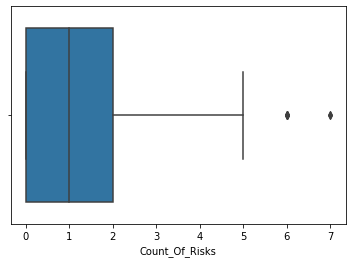

In [7]:


sns.boxplot(df['Count_Of_Risks'])

C:\Users\Gallo\anaconda3\envs\GPUenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

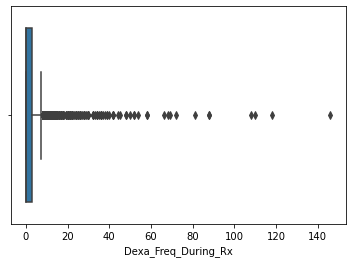

In [8]:
sns.boxplot(df['Dexa_Freq_During_Rx'])

# Skewness

In [9]:
# skewness along the index axis
df.skew(axis = 0)

C:\Users\Gallo\AppData\Local\Temp/ipykernel_22816/568673259.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

There cannot be skewness in this dataset since this is almost all categorical data

# Inconsistent Data Entry

Ran this code for each colunm to check for inconsistent data entry. None of the columns had spelling mistakes, duplicates, added spaces or different upper and lower cases.

In [10]:
# get all the unique values in the column
data = df['Ntm_Speciality'].unique()

# sort them alphabetically and then take a closer look
data.sort()
data

array(['CARDIOLOGY', 'CLINICAL NURSE SPECIALIST', 'EMERGENCY MEDICINE',
       'ENDOCRINOLOGY', 'GASTROENTEROLOGY', 'GENERAL PRACTITIONER',
       'GERIATRIC MEDICINE', 'HEMATOLOGY & ONCOLOGY',
       'HOSPICE AND PALLIATIVE MEDICINE', 'HOSPITAL MEDICINE',
       'NEPHROLOGY', 'NEUROLOGY', 'NUCLEAR MEDICINE',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'OBSTETRICS AND GYNECOLOGY', 'OCCUPATIONAL MEDICINE', 'ONCOLOGY',
       'OPHTHALMOLOGY', 'ORTHOPEDIC SURGERY', 'ORTHOPEDICS',
       'OTOLARYNGOLOGY', 'PAIN MEDICINE', 'PATHOLOGY', 'PEDIATRICS',
       'PHYSICAL MEDICINE AND REHABILITATION', 'PLASTIC SURGERY',
       'PODIATRY', 'PSYCHIATRY AND NEUROLOGY', 'PULMONARY MEDICINE',
       'RADIOLOGY', 'RHEUMATOLOGY', 'SURGERY AND SURGICAL SPECIALTIES',
       'TRANSPLANT SURGERY', 'UROLOGY', 'Unknown', 'VASCULAR SURGERY'],
      dtype=object)

# EDA

array([<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>,
       <AxesSubplot:title={'center':'Count_Of_Risks'}>], dtype=object)

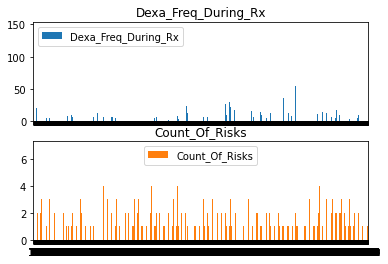

In [11]:
#pyplot.bar(df, figsize=(4,5))

df.plot.bar(rot=0, subplots=True)

In [12]:
temp_df = df.copy()
temp_df = temp_df.drop(['Ptid', 'Dexa_Freq_During_Rx', 'Count_Of_Risks'], axis=1)

def count_value(temp_df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(df, temp_df)


For column Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

For column Gender
Female    3230
Male       194
Name: Gender, dtype: int64

For column Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

For column Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

For column Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

For column Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

For column Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                          

Name: Concom_Anaesthetics_General, dtype: int64

For column Concom_Viral_Vaccines
N    3071
Y     353
Name: Concom_Viral_Vaccines, dtype: int64

For column Risk_Type_1_Insulin_Dependent_Diabetes
N    3285
Y     139
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

For column Risk_Osteogenesis_Imperfecta
N    3421
Y       3
Name: Risk_Osteogenesis_Imperfecta, dtype: int64

For column Risk_Rheumatoid_Arthritis
N    3294
Y     130
Name: Risk_Rheumatoid_Arthritis, dtype: int64

For column Risk_Untreated_Chronic_Hyperthyroidism
N    3422
Y       2
Name: Risk_Untreated_Chronic_Hyperthyroidism, dtype: int64

For column Risk_Untreated_Chronic_Hypogonadism
N    3297
Y     127
Name: Risk_Untreated_Chronic_Hypogonadism, dtype: int64

For column Risk_Untreated_Early_Menopause
N    3412
Y      12
Name: Risk_Untreated_Early_Menopause, dtype: int64

For column Risk_Patient_Parent_Fractured_Their_Hip
N    3168
Y     256
Name: Risk_Patient_Parent_Fractured_Their_Hip, dtype: int64

For column 

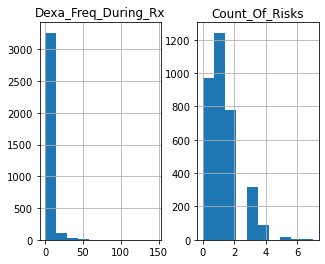

In [13]:
df.hist(figsize=(5,4))
pyplot.show()

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

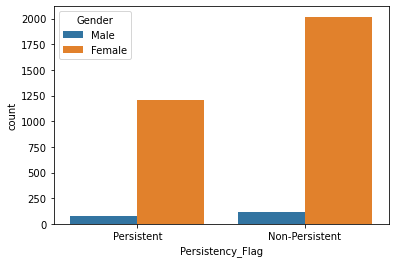

In [15]:
sns.countplot(data=df, x='Persistency_Flag', hue='Gender')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

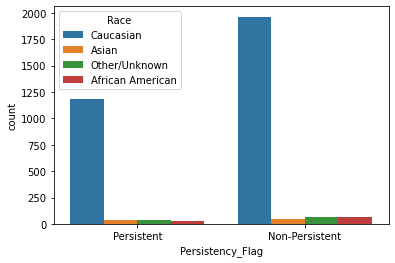

In [16]:
sns.countplot(data=df, x='Persistency_Flag', hue='Race')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

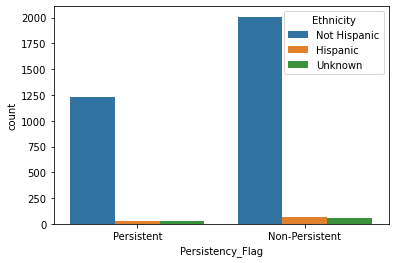

In [17]:
sns.countplot(data=df, x='Persistency_Flag', hue='Ethnicity')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

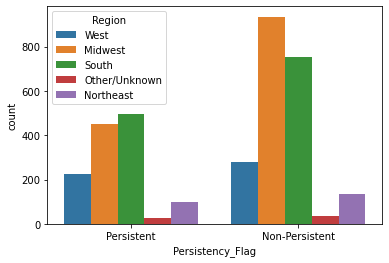

In [18]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

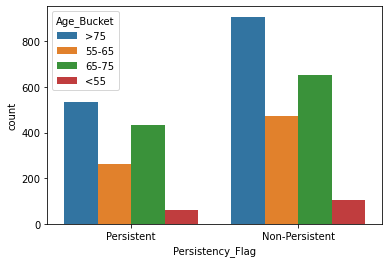

In [19]:
sns.countplot(data=df, x='Persistency_Flag', hue='Age_Bucket')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

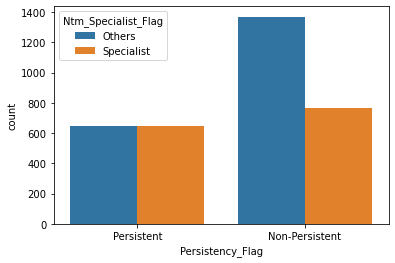

In [20]:
sns.countplot(data=df, x='Persistency_Flag', hue='Ntm_Specialist_Flag')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

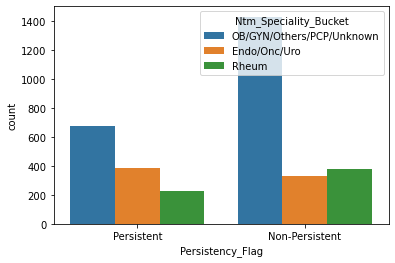

In [21]:
sns.countplot(data=df, x='Persistency_Flag', hue='Ntm_Speciality_Bucket')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

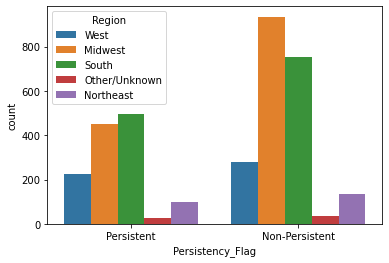

In [22]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

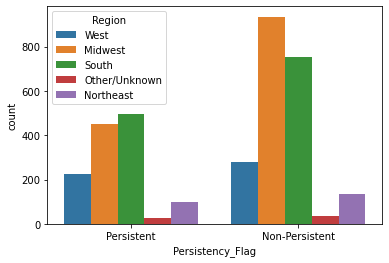

In [23]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

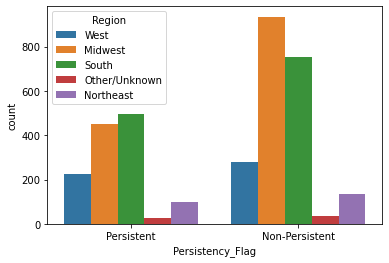

In [24]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

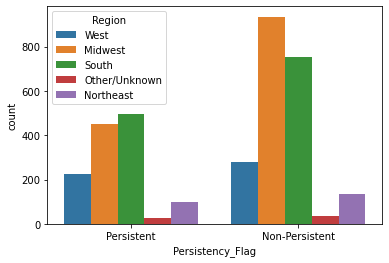

In [25]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

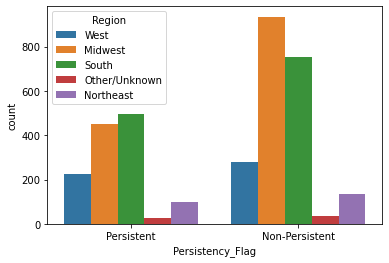

In [26]:
sns.countplot(data=df, x='Persistency_Flag', hue='Region')

# Transformation

Binary Feature Encoding

In [27]:
# finding all columns with N and Y as data
bool_cols = [col for col in df if np.isin(df[col].unique(), ['N', 'Y']).all() ]
bool_cols

C:\Users\Gallo\anaconda3\envs\GPUenv\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [28]:
# replacing N and Y data with 0 and 1
df[['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 
   'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 
   'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 
   'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
   'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
   'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
   'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
   'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
   'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics',
   'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
   'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 
   'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes', 
   'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 
   'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 
   'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 
   'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty',
   'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
   'Risk_Recurring_Falls']] = df[['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 
   'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 
   'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 
   'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
   'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
   'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
   'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
   'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
   'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics',
   'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
   'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 
   'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes', 
   'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 
   'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 
   'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 
   'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty',
   'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
   'Risk_Recurring_Falls']].replace({'N':1, 'Y':0})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [30]:
df['Persistency_Flag'] = df['Persistency_Flag'].replace({'Non-Persistent':1, 'Persistent':0})
df['Gender'] = df['Gender'].replace({'Female':1, 'Male':0})
df['Ntm_Specialist_Flag'] = df['Ntm_Specialist_Flag'].replace({'Others':1, 'Specialist':0})
df['Risk_Segment_Prior_Ntm'] = df['Risk_Segment_Prior_Ntm'].replace({'HR_VHR':1, 'VLR_LR':0})
df['Adherent_Flag'] = df['Adherent_Flag'].replace({'Adherent':1, 'Non-Adherent':0})
df['Tscore_Bucket_Prior_Ntm'] = df['Tscore_Bucket_Prior_Ntm'].replace({'<=-2.5':1, '>-2.5':0})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   int64 
 2   Gender                                                              3424 non-null   int64 
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

Nominal Feature Encoding

In [32]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', columns=['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 
                                                         'Ntm_Speciality_Bucket', 'Risk_Segment_During_Rx', 'Change_T_Score', 
                                                         'Change_Risk_Segment', 'Tscore_Bucket_During_Rx'], drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Columns: 118 entries, Ptid to Tscore_Bucket_During_Rx_Unknown
dtypes: int64(58), object(1), uint8(59)
memory usage: 1.7+ MB


In [34]:
df.head()

,Ptid,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown
0,P1,0,0,1,1,1,0,1,1,1,...,0,1,1,0,0,0,1,0,0,0
1,P2,1,0,1,1,1,0,1,1,1,...,1,0,0,1,0,0,1,0,0,1
2,P3,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
3,P4,1,1,1,1,0,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
4,P5,1,1,1,0,0,0,1,1,1,...,1,0,0,1,0,0,1,0,0,1


In [35]:
df = df.drop(['Ptid'], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Columns: 117 entries, Persistency_Flag to Tscore_Bucket_During_Rx_Unknown
dtypes: int64(58), uint8(59)
memory usage: 1.7 MB


In [37]:
df.head()

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown
0,0,0,1,1,1,0,1,1,1,0,...,0,1,1,0,0,0,1,0,0,0
1,1,0,1,1,1,0,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,0
4,1,1,1,0,0,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,1


# Exploratory Data Analysis

The target variable is the Persistency_Flag

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

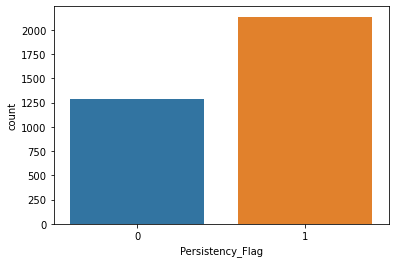

In [38]:
sns.countplot(x='Persistency_Flag', data=df)

In [39]:
# How many drugs were persistance on patient
persistant = df[df['Persistency_Flag'] == 0].shape[0]
non_persistant = df[df['Persistency_Flag'] == 1].shape[0]
print('Persistant =', persistant)
print('Non-Persistant =', non_persistant)

Persistant = 1289
Non-Persistant = 2135


There are a lot more non-persistant drugs.

<AxesSubplot:xlabel='Persistency_Flag', ylabel='Count'>

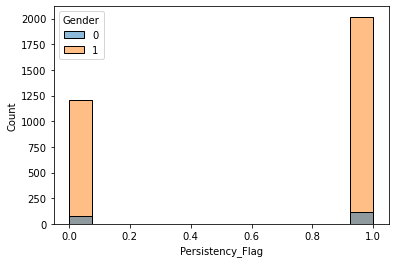

In [40]:
# 0 = Male and 1 = Female
# 0 = Persistance and 1 = Non-Persistant
sns.histplot(x='Persistency_Flag', hue='Gender', data=df)

There are a lot more female than male patients and the persistancy of the drugs seems to be more so for females than males by a lot.

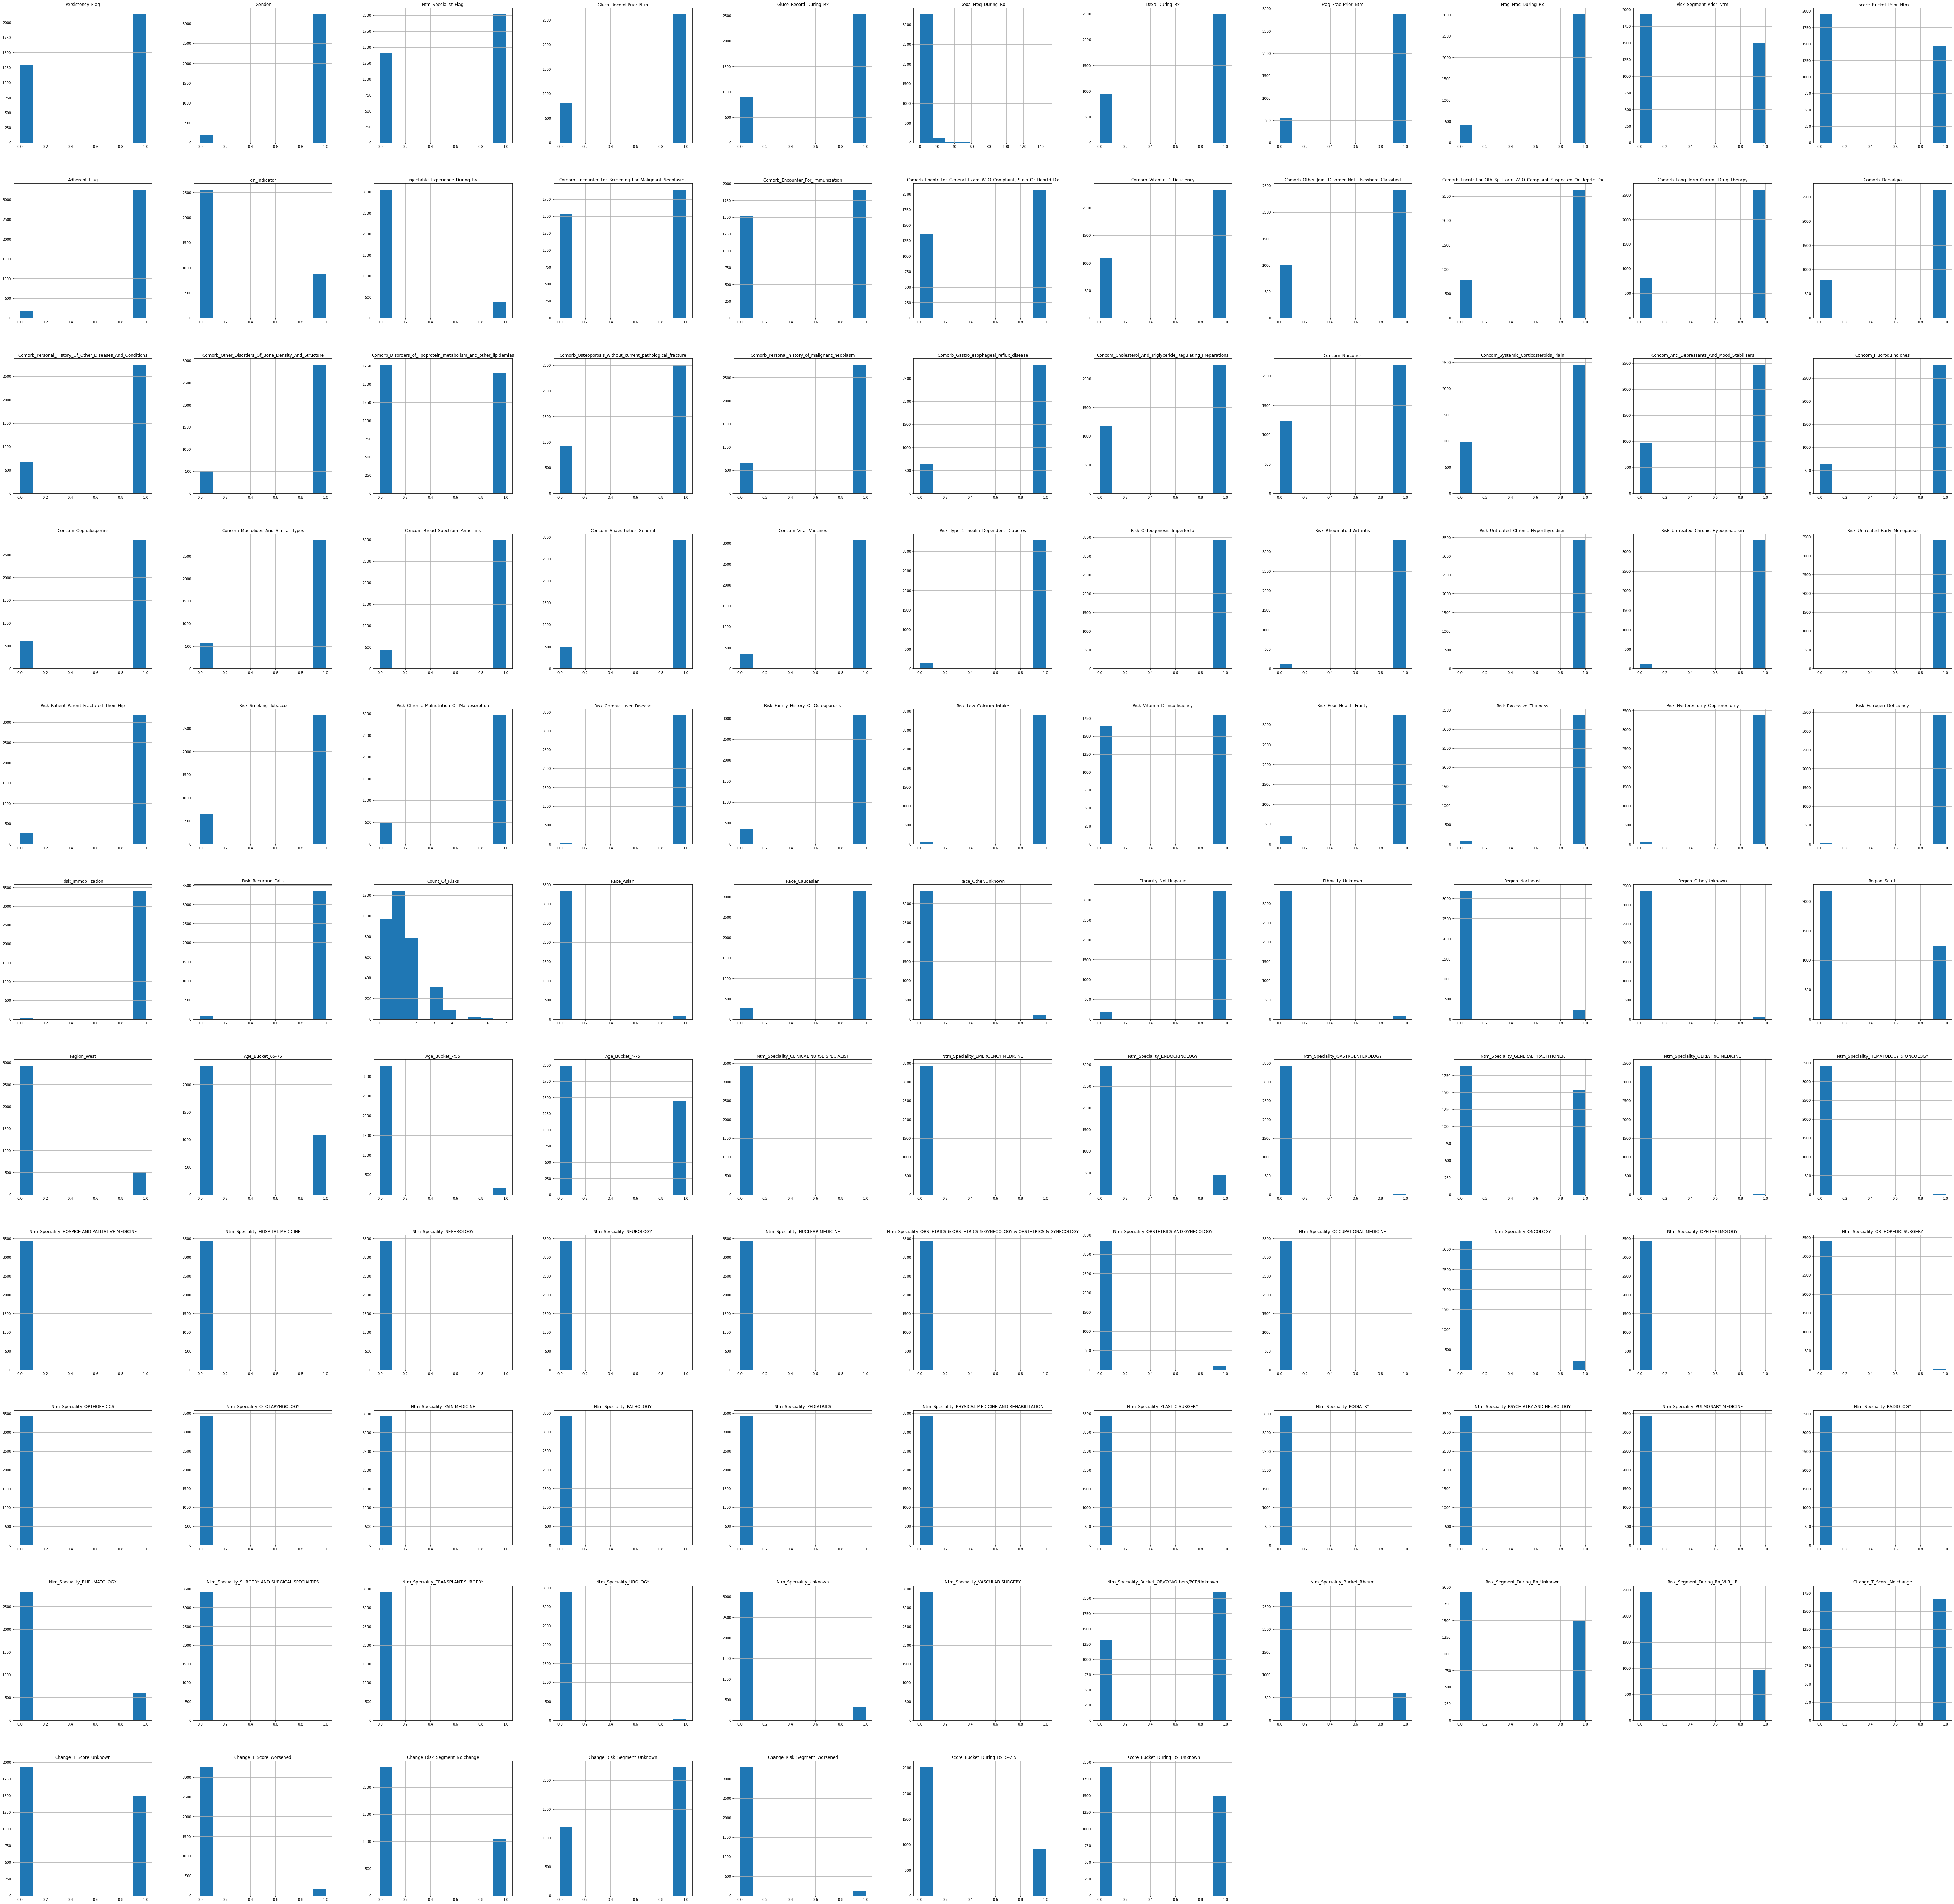

In [49]:
df.hist(figsize=(100,100))
pyplot.show()

<AxesSubplot:>

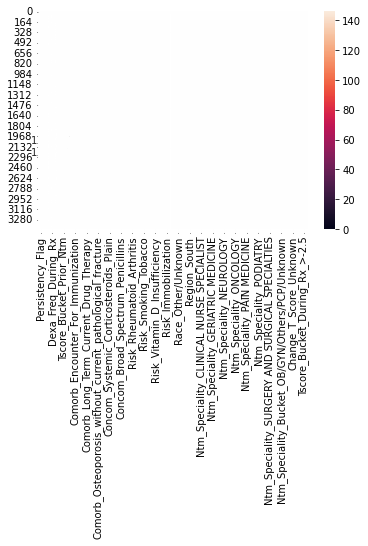

In [50]:
sns.heatmap(data=df, annot=True)

In [53]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')